<a href="https://colab.research.google.com/github/shadeq2022/Belajar-Pengembangan-Machine-Learning/blob/main/Project%20One%3A%20Creating%20an%20NLP%20Model%20with%20TensorFlow/Creating%20an%20NLP%20Model%20with%20TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Membuat Model NLP dengan TensorFlow**

# **Data diri (sesuai profil dicoding)**

Nama : Muhammad Shadeq

Universitas Andalas

# **1. Import Library yang dibutuhkan**

In [46]:
#library impor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import nltk
import re
import string
import unicodedata

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **2. Mengakses dan Visualisasi Data**

In [59]:
#variabel data berita
data_berita = pd.read_csv('Daily_Google_News_2023_10.csv')
data_berita.head()

,Title,Publisher,DateTime,Link,Category
0,"How much do you get if you have 1, 2 or 3 Powe...",AS USA,2023-09-23T23:40:00Z,https://news.google.com/articles/CBMiXWh0dHBzO...,Business
1,October 2023 On the Scene: Expansion and Acqui...,Engineering News-Record,2023-09-26T17:50:00Z,https://news.google.com/articles/CBMiVmh0dHBzO...,Business
2,Snap’s Uphill Struggle For Revenue Beyond Adve...,AdExchanger,2023-09-28T04:03:08Z,https://news.google.com/articles/CBMiQWh0dHBzO...,Business
3,Powerball jackpot rises to $925 million after ...,AOL,2023-09-28T04:45:00Z,https://news.google.com/articles/CBMiTGh0dHBzO...,Business
4,Powerball Winner: Did Anyone Win Wednesday's $...,iHeartRadio,2023-09-28T12:20:22Z,https://news.google.com/articles/CBMiaWh0dHBzO...,Business


In [60]:
#hapus columns yang tidak digunakan
del_col = ['Publisher','DateTime','Link']
data_berita = data_berita.drop(columns=del_col)
data_berita

,Title,Category
0,"How much do you get if you have 1, 2 or 3 Powe...",Business
1,October 2023 On the Scene: Expansion and Acqui...,Business
2,Snap’s Uphill Struggle For Revenue Beyond Adve...,Business
3,Powerball jackpot rises to $925 million after ...,Business
4,Powerball Winner: Did Anyone Win Wednesday's $...,Business
...,...,...
54049,Hamas horrors you luckily won't see -- glimpse...,Worldwide
54050,UN warns ‘civil order’ declining in Gaza as th...,Worldwide
54051,Russian security forces remove pro-Palestinian...,Worldwide
54052,Israel ‘Expanding’ War Operations in Gaza: Ham...,Worldwide


In [61]:
#jumlah semua data
data_berita.shape

(54054, 2)

In [62]:
data_berita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54054 entries, 0 to 54053
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     54051 non-null  object
 1   Category  54054 non-null  object
dtypes: object(2)
memory usage: 844.7+ KB


In [63]:
#Fokus ke Category
data_berita.Category.value_counts()

Sports           8230
Headlines        7767
Business         7452
Entertainment    7282
Worldwide        7029
Technology       6934
Health           5001
Science          4359
Name: Category, dtype: int64

In [64]:
# Check apakah data terdapat nilai Null
data_berita.isnull().sum()

Title       3
Category    0
dtype: int64

In [65]:
# Menghapus baris dengan nilai null pada kolom "Title"
data_berita = data_berita.dropna(subset=['Title'])

# Verifikasi bahwa nilai null telah dihapus
print(data_berita.isnull().sum())

Title       0
Category    0
dtype: int64


In [66]:
#jumlah semua data
data_berita.shape

(54051, 2)

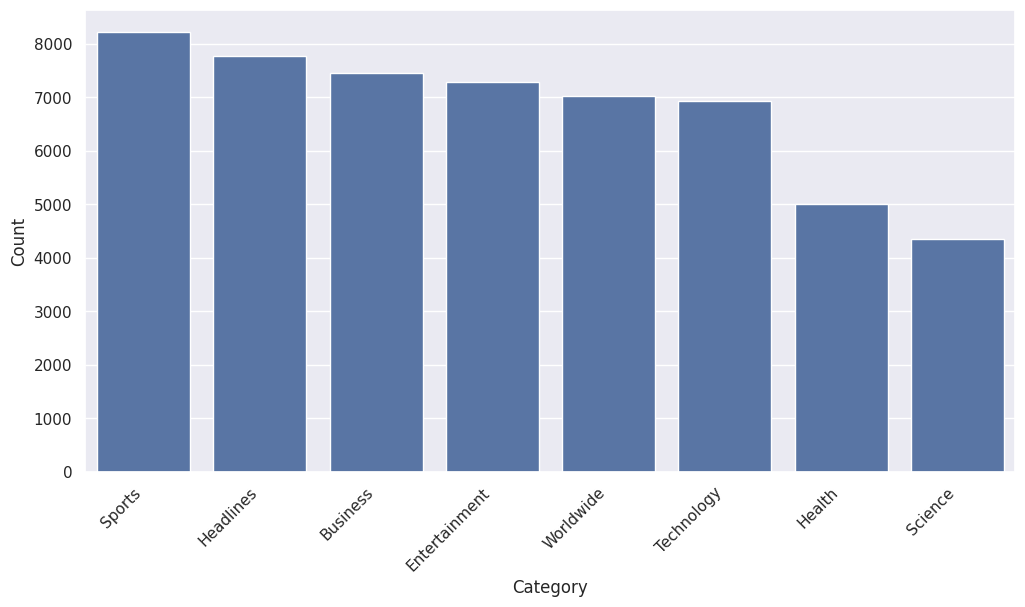

In [67]:
#Visualisasi data berdasarkan Category
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x="Category", data=data_berita, order=data_berita['Category'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## **3. Data Cleaning**